# Test Types
In this visuals we want to discorer the following

* Visualize what test types are being used the most.
* Visualize what test types give the most issues(blast and linter)

importing libararies

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

## Loading the data

In [ ]:
read_linting_results = pd.read_csv('data/blast_linting_results.csv')
read_review_test_results = pd.read_csv('data/blast_review_test_results.csv')
read_reviews = pd.read_csv('data/blast_reviews.csv')
data_tests = pd.read_csv('data/blast_tests.csv')
read_code_blast_tests = pd.read_csv('data/code_blast_tests.csv')
read_exercises = pd.read_csv('data/exercises.csv')
data_implementation_exercise = pd.read_csv('data/implementation_exercise.csv')

# Cleaned data

In [ ]:
data_linting_result_warning= read_linting_results[['blast_review_id', 'file_name', 'message', 'type', 'line', 'column']]
data_linting_result = data_linting_result_warning[data_linting_result_warning['type'].str.lower().isin(['error'])]

data_review_test_results = read_review_test_results[['blast_review_id', 'test_id', 'human_error_message', 'test_language']]

data_reviews = read_reviews[['id', 'implementation_id', 'state', 'created_on']]

data_exercises = read_exercises[['id', 'title', 'files_to_turn_in']]

data_code_blast_tests = read_code_blast_tests[['id', 'exercise_id', 'title', 'test_type', 'created_on', 'language']]

Counting the tests

In [ ]:
unique_counts = data_tests["test_type"].value_counts()
unique_counts

PHP_UNIT    410
PYTHON       99
NODE_JS      57
C_SHARP       1
Name: test_type, dtype: int64

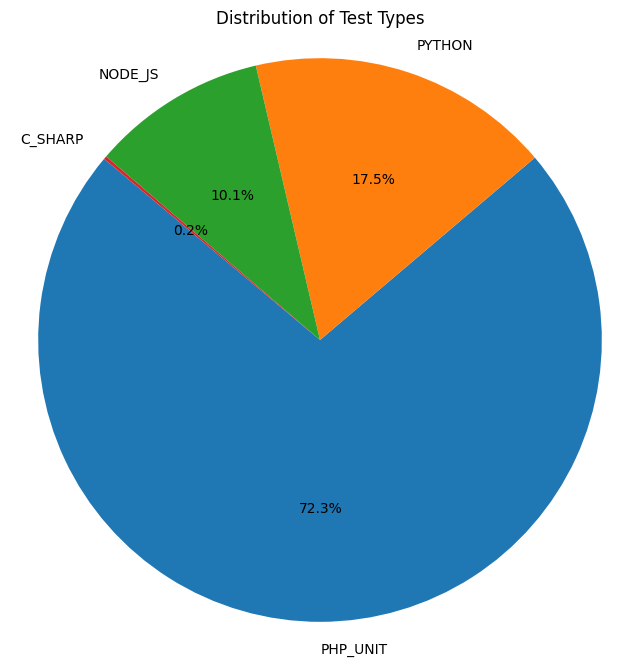

In [ ]:
# Assuming you have already calculated unique_counts using value_counts()
unique_counts = data_tests["test_type"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(unique_counts, labels=unique_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Test Types")
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the pie chart
plt.show()


Kijk naar de structuur van de blast errors, ze zullen de zelfde structuur hebben als het gaat om linting of echt een opdracht

Visualize what test types give the most issues(blast and linter)

Making the visual more specific by sepporate the linter and blast issues

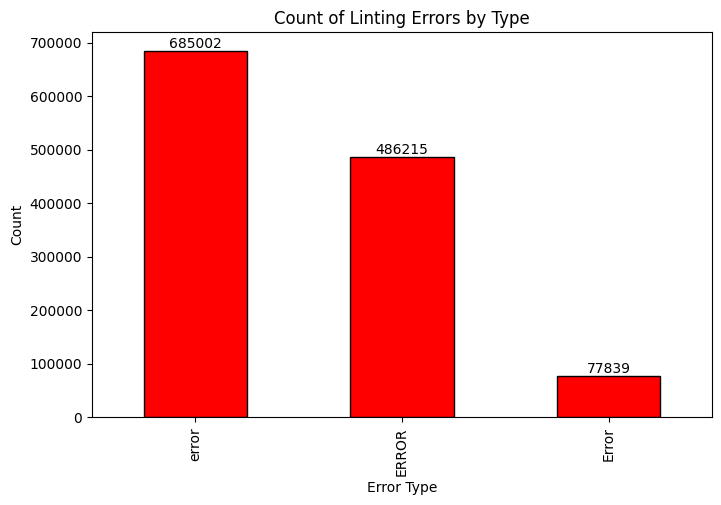

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the dataset for errors
error_data_linting = data_linting_result[data_linting_result['source'].str.lower().isin(['PEAR'])]

# Count the number of errors by type
error_counts = error_data_linting['type'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 5))
error_counts.plot(kind='bar', color='blue', edgecolor='black')

# Set the title and labels
plt.title('Count of Linting Errors by Type')
plt.xlabel('Error Type')
plt.ylabel('Count')

# Display the counts on top of the bars
for i, value in enumerate(error_counts):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Show the chart
plt.show()


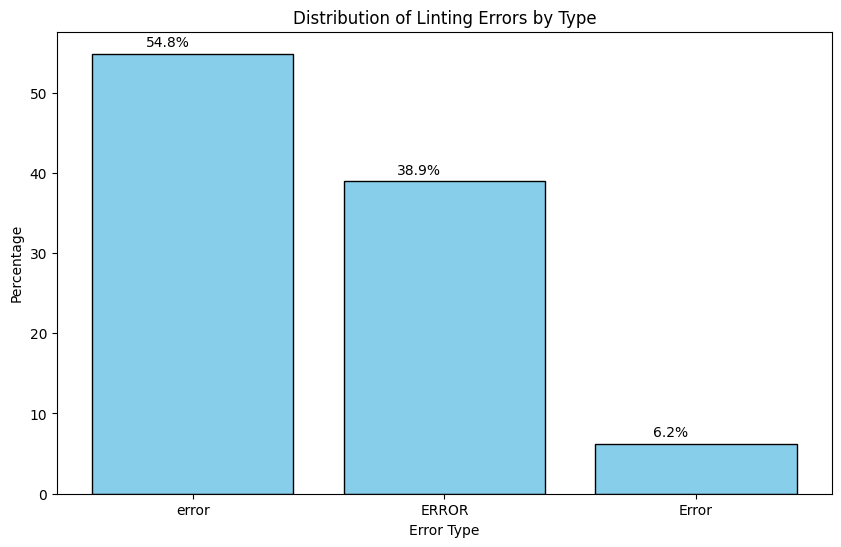

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data_linting_result_warning' is the dataset with linting errors
data_linting_result_warning = read_linting_results[['blast_review_id', 'file_name', 'message', 'type', 'line', 'column']]

# Filter the dataset for errors
error_data = data_linting_result_warning[data_linting_result_warning['type'].str.lower().isin(['error'])]

# Count the number of errors by type
error_counts = error_data['type'].value_counts()

# Calculate error percentages
error_percentages = (error_counts / error_counts.sum()) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(error_percentages.index, error_percentages, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Linting Errors by Type')
plt.xlabel('Error Type')
plt.ylabel('Percentage')

# Display the percentages on top of the bars
for bar, percentage in zip(bars, error_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.5, f'{percentage:.1f}%', ha='center', va='bottom', color='black')

# Show the chart
plt.show()


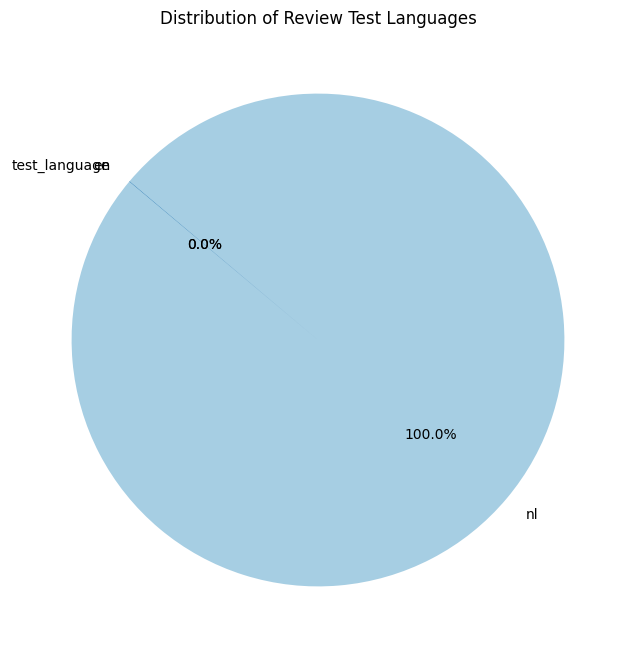